<a href="https://colab.research.google.com/github/luciotravassos/colab/blob/main/Fundamentus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import fundamentus as fd
import investpy as py
from pymongo import MongoClient
import pymongo

In [2]:
#pip install investpy

In [3]:
#pip install fundamentus

In [4]:
df = fd.get_papel('WEGE3')
df

,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
WEGE3,WEGE3,ON N1,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",37.60,2022-12-05,22.65,40.90,338779000,...,19548400000,3835040000,-307886000,13894500000,28465100000,5182090000,3888950000,7911190000,1624660000,1158030000


In [5]:
fd.get_setor_id('energia')

32



```
# This is formatted as code
```

<h2> Extraindo Dados</h2>

In [6]:
df = fd.get_resultado()

In [7]:
 full = fd.get_resultado_raw()

<h2> Tratando os Dados </h2>

In [8]:
ativos = df[(df['pvp'] < 1) & (df['pvp'] > 0) & (df['pl'] > 0) & (df['dy'] > 0.06) ] # Separei valores de pvp menores do que 1 e maiores do que zero para evitar valores negativos

In [9]:
ativos_cp = ativos.copy()

In [10]:
data = ativos_cp.reset_index()
data.head(3)

Multiples,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,...,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.0000,0.1505,0.00,18159000.0,5.070730e+09,0.00,0.3047
1,ALLD3,6.11,7.71,0.38,0.105,0.1421,0.152,0.54,3.17,2.10,...,4.34,0.0331,0.0136,0.0729,0.0488,1.72,325871.0,1.512190e+09,0.42,-0.0549
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,6.44,0.0431,0.0015,0.0361,0.0029,2.24,430456000.0,1.470560e+10,1.41,0.4703


In [11]:
data.columns

Index(['papel', 'cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit',
       'pacl', 'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe',
       'liqc', 'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

In [12]:
data.isnull().sum()

Multiples
papel       0
cotacao     0
pl          0
pvp         0
psr         0
dy          0
pa          0
pcg         0
pebit       0
pacl        0
evebit      0
evebitda    0
mrgebit     0
mrgliq      0
roic        0
roe         0
liqc        0
liq2m       0
patrliq     0
divbpatr    0
c5y         0
dtype: int64

In [13]:
data.head(5)

Multiples,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,...,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.0000,0.1505,0.00,18159000.0,5.070730e+09,0.00,0.3047
1,ALLD3,6.11,7.71,0.38,0.105,0.1421,0.152,0.54,3.17,2.10,...,4.34,0.0331,0.0136,0.0729,0.0488,1.72,325871.0,1.512190e+09,0.42,-0.0549
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,6.44,0.0431,0.0015,0.0361,0.0029,2.24,430456000.0,1.470560e+10,1.41,0.4703
3,BAZA3,51.00,2.51,0.59,0.000,0.0710,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.0000,0.2336,0.00,325272.0,4.881810e+09,0.00,0.2358
4,BBAS3,35.20,3.67,0.69,0.000,0.1135,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.0000,0.1870,0.00,832758000.0,1.471290e+11,0.00,0.1606


In [14]:
data.shape

(57, 21)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   papel     57 non-null     object 
 1   cotacao   57 non-null     float64
 2   pl        57 non-null     float64
 3   pvp       57 non-null     float64
 4   psr       57 non-null     float64
 5   dy        57 non-null     float64
 6   pa        57 non-null     float64
 7   pcg       57 non-null     float64
 8   pebit     57 non-null     float64
 9   pacl      57 non-null     float64
 10  evebit    57 non-null     float64
 11  evebitda  57 non-null     float64
 12  mrgebit   57 non-null     float64
 13  mrgliq    57 non-null     float64
 14  roic      57 non-null     float64
 15  roe       57 non-null     float64
 16  liqc      57 non-null     float64
 17  liq2m     57 non-null     float64
 18  patrliq   57 non-null     float64
 19  divbpatr  57 non-null     float64
 20  c5y       57 non-null     float64


In [16]:
data2 = data.drop(labels = 'pacl', axis = 1)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
data2['pvp'] = LabelEncoder().fit_transform(data2['pvp'])

In [19]:
data2['dy'] = LabelEncoder().fit_transform(data2['dy'])

In [20]:
data2['roe'] = LabelEncoder().fit_transform(data2['roe'])

In [21]:
data2.head()

Multiples,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
0,ABCB4,19.48,5.77,31,0.000,7,0.000,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,24,0.00,18159000.0,5.070730e+09,0.00,0.3047
1,ALLD3,6.11,7.71,3,0.105,39,0.152,0.54,3.17,6.13,4.34,0.0331,0.0136,0.0729,5,1.72,325871.0,1.512190e+09,0.42,-0.0549
2,AMER3,9.00,191.08,12,0.293,9,0.174,0.66,6.79,16.89,6.44,0.0431,0.0015,0.0361,0,2.24,430456000.0,1.470560e+10,1.41,0.4703
3,BAZA3,51.00,2.51,13,0.000,12,0.000,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,35,0.00,325272.0,4.881810e+09,0.00,0.2358
4,BBAS3,35.20,3.67,19,0.000,33,0.000,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,27,0.00,832758000.0,1.471290e+11,0.00,0.1606


In [22]:
dados = data2.iloc[:, [3,5,14]].values
dados

array([[31,  7, 24],
       [ 3, 39,  5],
       [12,  9,  0],
       [13, 12, 35],
       [19, 33, 27],
       [36, 21, 25],
       [37, 19, 25],
       [ 2, 45,  9],
       [ 7,  6,  7],
       [14,  8, 19],
       [22,  1, 34],
       [19,  3, 12],
       [ 1, 17, 12],
       [ 9,  7, 14],
       [ 9, 24, 15],
       [18, 11, 15],
       [ 6, 29, 15],
       [26, 46, 30],
       [23, 48, 30],
       [24, 49, 30],
       [21, 34, 23],
       [18, 36, 23],
       [17, 27, 26],
       [24, 28, 26],
       [38, 17,  4],
       [34, 15,  4],
       [10, 23, 10],
       [33,  2, 20],
       [29, 53,  8],
       [39, 42, 28],
       [39, 37, 32],
       [25, 44, 32],
       [28, 38, 33],
       [35, 30, 36],
       [30, 41, 37],
       [23, 32, 38],
       [27, 26, 38],
       [22, 13,  6],
       [ 0, 16,  3],
       [32, 35, 18],
       [14, 18, 17],
       [11,  0,  1],
       [24, 47, 41],
       [15, 10, 13],
       [ 5, 20,  2],
       [ 8, 40, 21],
       [32, 50, 39],
       [13, 1

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


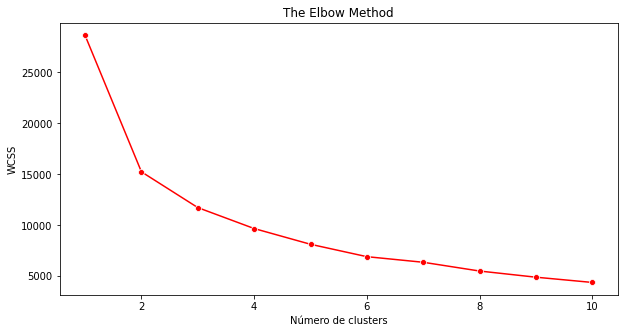

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)

In [27]:
kmeans1 = kmeans.fit(dados)

In [28]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[24.86956522, 40.08695652, 30.69565217],
       [20.82608696,  9.95652174, 16.        ],
       [ 4.72727273, 28.09090909, 14.        ]])

In [29]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1], dtype=int32)

In [30]:
import plotly.express as px
import plotly.graph_objects as go

In [31]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15,15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Liquidez Diária')
graf3.update_yaxes(title = 'Quantidade de Ativos')
graf3.show()

In [32]:
classificacao[3]

1

In [33]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])

In [34]:
df3 = pd.concat([data, agrupamento],axis=1)
df3

,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Grupo
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1505,0.00,1.815900e+07,5.070730e+09,0.00,0.3047,1
1,ALLD3,6.11,7.71,0.38,0.105,0.1421,0.152,0.54,3.17,2.10,...,0.0331,0.0136,0.0729,0.0488,1.72,3.258710e+05,1.512190e+09,0.42,-0.0549,2
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,0.0431,0.0015,0.0361,0.0029,2.24,4.304560e+08,1.470560e+10,1.41,0.4703,1
3,BAZA3,51.00,2.51,0.59,0.000,0.0710,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.2336,0.00,3.252720e+05,4.881810e+09,0.00,0.2358,1
4,BBAS3,35.20,3.67,0.69,0.000,0.1135,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1870,0.00,8.327580e+08,1.471290e+11,0.00,0.1606,0
5,BEES3,6.06,5.71,0.95,0.000,0.0855,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1667,0.00,1.354970e+05,2.009400e+09,0.00,0.0776,1
6,BEES4,6.17,5.82,0.97,0.000,0.0840,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1667,0.00,3.576720e+04,2.009400e+09,0.00,0.0776,1
7,BMGB4,2.28,6.60,0.35,0.000,0.2437,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0525,0.00,3.759630e+06,3.839060e+09,0.00,-0.1018,2
8,BMIN4,13.00,9.47,0.47,0.000,0.0654,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0494,0.00,1.114000e+03,1.341040e+08,0.00,0.1533,1
9,BMKS3,271.86,5.43,0.60,6.895,0.0658,0.540,0.70,-31.31,0.78,...,-0.2202,1.2697,-0.0628,0.1105,36.02,3.812040e+03,2.061030e+08,0.01,0.0835,1


In [35]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0

,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Grupo
4,BBAS3,35.20,3.67,0.69,0.000,0.1135,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1870,0.00,8.327580e+08,1.471290e+11,0.00,0.1606,0
17,CEBR3,10.51,3.88,0.79,1.916,0.3370,0.561,1.27,4.17,1.35,...,0.4596,0.6868,0.2221,0.2030,6.90,6.002320e+04,9.625560e+08,0.00,-0.4332,0
18,CEBR5,9.82,3.62,0.74,1.790,0.3607,0.524,1.19,3.90,1.26,...,0.4596,0.6868,0.2221,0.2030,6.90,6.210670e+04,9.625560e+08,0.00,-0.4332,0
19,CEBR6,10.03,3.70,0.75,1.829,0.3884,0.536,1.21,3.98,1.28,...,0.4596,0.6868,0.2221,0.2030,6.90,1.857720e+05,9.625560e+08,0.00,-0.4332,0
20,CGRA3,29.98,5.00,0.72,0.859,0.1164,0.514,1.94,4.69,3.27,...,0.1833,0.1719,0.1329,0.1433,2.51,4.270290e+04,8.094260e+08,0.00,0.1068,0
21,CGRA4,28.25,4.71,0.68,0.809,0.1235,0.485,1.83,4.42,3.08,...,0.1833,0.1719,0.1329,0.1433,2.51,2.597450e+05,8.094260e+08,0.00,0.1068,0
22,CLSC3,50.05,3.67,0.66,0.187,0.0993,0.161,-9.79,2.88,-0.34,...,0.0651,0.0510,0.0696,0.1791,0.95,4.721390e+04,2.933340e+09,0.87,0.0953,0
23,CLSC4,57.01,4.18,0.75,0.213,0.1041,0.183,-11.15,3.28,-0.39,...,0.0651,0.0510,0.0696,0.1791,0.95,2.607010e+05,2.933340e+09,0.87,0.0953,0
28,DESK3,9.00,16.94,0.85,1.234,4.9284,0.325,9.59,4.95,-0.75,...,0.2494,0.0853,0.0770,0.0503,1.23,2.025260e+06,9.209070e+08,0.95,0.0000,0
29,DXCO3,7.70,5.20,0.99,0.669,0.1512,0.378,3.60,3.87,-1.46,...,0.1730,0.1288,0.1237,0.1909,1.41,4.023890e+07,5.906810e+09,0.95,0.1849,0


In [36]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Grupo
0,ABCB4,19.48,5.77,0.87,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1505,0.00,1.815900e+07,5.070730e+09,0.00,0.3047,1
2,AMER3,9.00,191.08,0.56,0.293,0.0685,0.174,0.66,6.79,-0.82,...,0.0431,0.0015,0.0361,0.0029,2.24,4.304560e+08,1.470560e+10,1.41,0.4703,1
3,BAZA3,51.00,2.51,0.59,0.000,0.0710,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.2336,0.00,3.252720e+05,4.881810e+09,0.00,0.2358,1
5,BEES3,6.06,5.71,0.95,0.000,0.0855,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1667,0.00,1.354970e+05,2.009400e+09,0.00,0.0776,1
6,BEES4,6.17,5.82,0.97,0.000,0.0840,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1667,0.00,3.576720e+04,2.009400e+09,0.00,0.0776,1
8,BMIN4,13.00,9.47,0.47,0.000,0.0654,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0494,0.00,1.114000e+03,1.341040e+08,0.00,0.1533,1
9,BMKS3,271.86,5.43,0.60,6.895,0.0658,0.540,0.70,-31.31,0.78,...,-0.2202,1.2697,-0.0628,0.1105,36.02,3.812040e+03,2.061030e+08,0.01,0.0835,1
10,BNBR3,72.51,3.14,0.73,0.000,0.0618,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.2320,0.00,6.879880e+03,8.589190e+09,0.00,0.1964,1
11,BRGE6,12.01,11.26,0.69,221.899,0.0630,0.265,0.78,-1.28,1.87,...,-173.1340,29.1714,-0.3555,0.0609,2.33,1.252000e+02,1.290420e+09,0.00,-0.4027,1
13,BRIV4,9.28,6.91,0.49,0.000,0.0657,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0710,0.00,4.710810e+04,1.676120e+09,0.00,0.5995,1


In [37]:
grupo2 = df3.loc[df3.Grupo == 2]
grupo2

,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Grupo
1,ALLD3,6.11,7.71,0.38,0.105,0.1421,0.152,0.54,3.17,2.10,...,0.0331,0.0136,0.0729,0.0488,1.72,325871.0,1.512190e+09,0.42,-0.0549,2
7,BMGB4,2.28,6.60,0.35,0.000,0.2437,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0525,0.00,3759630.0,3.839060e+09,0.00,-0.1018,2
12,BRGE7,5.40,5.06,0.31,99.771,0.0817,0.119,0.35,-0.58,0.84,...,-173.1340,29.1714,-0.3555,0.0609,2.33,0.0,1.290420e+09,0.00,-0.4027,2
14,BRSR3,10.82,6.22,0.49,0.000,0.0950,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0790,0.00,69666.7,9.004730e+09,0.00,0.0267,2
16,BRSR6,9.72,5.59,0.44,0.000,0.1058,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0790,0.00,24694800.0,9.004730e+09,0.00,0.0267,2
26,CRIV4,5.11,9.34,0.50,0.000,0.0903,0.000,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0532,0.00,21877.9,1.057520e+09,0.00,0.0252,2
38,HBOR3,2.23,5.54,0.22,0.352,0.0810,0.059,0.15,5.88,-11.27,...,0.0599,0.1033,0.0107,0.0395,2.95,1961520.0,1.361990e+09,1.19,0.1621,2
44,MTRE3,3.85,11.17,0.41,0.612,0.0851,0.199,0.41,10.64,0.89,...,0.0575,0.0593,0.0227,0.0366,2.92,2296830.0,9.951890e+08,0.47,0.3257,2
45,MYPK3,12.80,3.83,0.48,0.119,0.1436,0.129,0.67,1.75,-0.71,...,0.0679,0.0366,0.1004,0.1257,1.58,25183800.0,4.089830e+09,1.52,0.1532,2
54,USIM3,7.60,1.90,0.39,0.290,0.0983,0.233,0.60,1.67,1.38,...,0.1735,0.1649,0.1735,0.2061,4.16,3522660.0,2.429220e+10,0.25,0.2919,2
